# Dave J Project

## Importing Necessary Functions 

We begin by importing the libraries we will need to analyse and visualise the data. 

In [57]:
#For data
import pandas as pd
import numpy as np

#For visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# Use the direct download link format
file_id = '1knlYNzuAATNKuNfxq7My7dh-EKrISoGi'
csv_url = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file
train_data = pd.read_csv(csv_url)


We now want to investigate features of the data.

In [37]:
train_data.shape()

(614, 13)

In [38]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
#investigating the distribution of the variables of the data

train_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<Axes: >

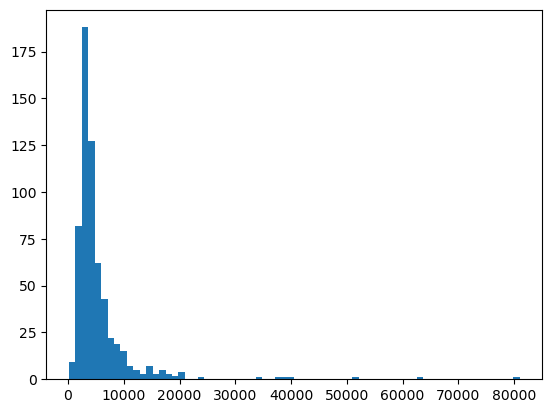

In [40]:
#Histogram of the loan applicant's income

train_data['ApplicantIncome'].hist(bins=70,grid=False)

<Axes: >

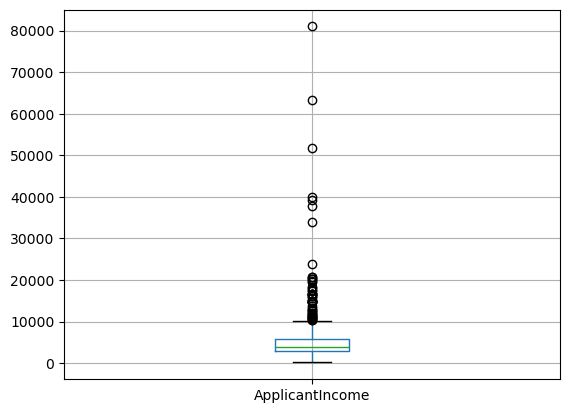

In [41]:
#Boxplot of applicant income to see the outliers and where the majority of the applicants income lies.

train_data.boxplot(column = 'ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

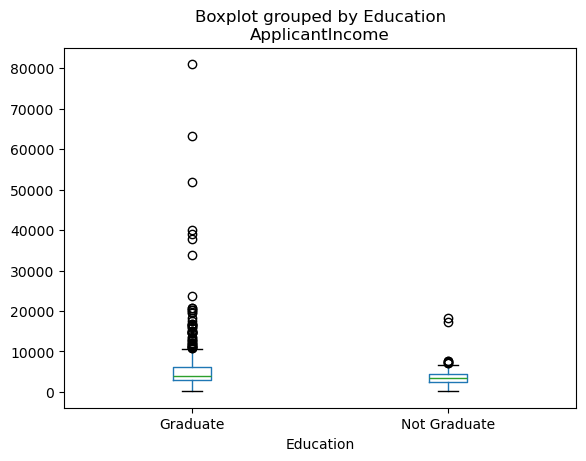

In [42]:
#Boxplot split between Grads and Non Grads to see the effect of education on the loan applicants

train_data.boxplot(column = 'ApplicantIncome', grid =False, by = 'Education')

<Axes: >

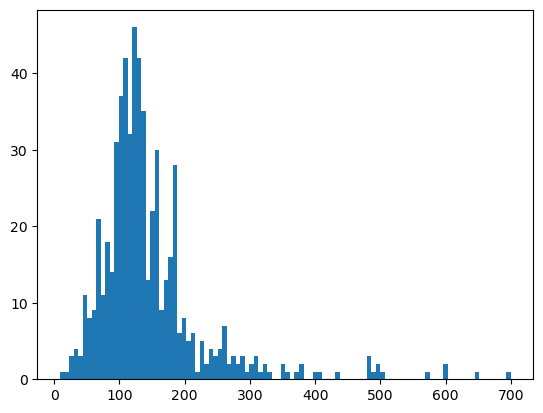

In [43]:
#Distribution of loans given out

train_data['LoanAmount'].hist(bins=100,grid = False)

<Axes: xlabel='Credit_History'>

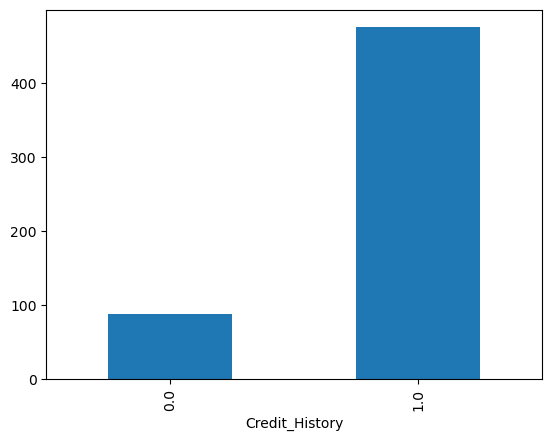

In [44]:
#Seeing who has a credit history and who doesn't

temp = train_data['Credit_History'].value_counts(ascending = True)
temp.plot(kind = 'bar')

In [45]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)

C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\2407879627.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace=True)


In [47]:
train_data['Self_Employed'].fillna('No',inplace=True)

C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\1899473978.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Self_Employed'].fillna('No',inplace=True)


In [48]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\3954965416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
C:\Users\djjjo\AppData\Local\Temp\ipykernel_339232\3954965416.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [49]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [50]:
train_data.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [52]:
X = train_data[['Credit_History','Gender','Married','Education']]
y = train_data['Loan_Status']

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
predictions = model.predict(X)

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predictions,y))

0.8094462540716613
